In [94]:
import sdepy
import numpy as np
import mplfinance as mpf
import requests
import json
import pandas as pd
import yfinance as yf

ALPHAVANTAGE_API = 'S09O7OIWCQWSMDGQ'

In [95]:
def check_stock_symbol(symbol):
    try:
        stock = yf.Ticker(symbol)
        info = stock.info
        # If the API returns a name, we assume the symbol is valid
        if 'shortName' in info:
            return f"{symbol} is a valid stock symbol: {info['shortName']}"
        else:
            return f"{symbol} is not a valid stock symbol"
    except Exception as e:
        return f"Error checking {symbol}: {e}"


In [120]:
# replace the "demo" apikey below with your own key from https://www.alphavantage.co/support/#api-key
def get_stocks_data(symbol, data):
    url = f'https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol={symbol}&month={data}&interval=1min&apikey={ALPHAVANTAGE_API}'
    r = requests.get(url)
    data = r.json()["Time Series (1min)"]
    print(data)
    df = pd.DataFrame([data[elem] for elem in data])
    df.rename(columns={
        '1. open': 'Open',
        '2. high': 'High',
        '3. low': 'Low',
        '4. close': 'Close',
        '5. volume': 'Volume'
    }, inplace=True)
    df['Open'] = df['Open'].astype(float)
    df['High'] = df['High'].astype(float)
    df['Low'] = df['Low'].astype(float)
    df['Close'] = df['Close'].astype(float)
    df['Volume'] = df['Volume'].astype(int)

    df['Date'] = data.keys()
    df.set_index('Date', inplace=True)
    df.index = pd.to_datetime(df.index)
    return(df)

In [130]:
df = get_stocks_data('IBM', '2021-09')

{'2021-09-30 19:46:00': {'1. open': '116.0186', '2. high': '116.0186', '3. low': '116.0186', '4. close': '116.0186', '5. volume': '418'}, '2021-09-30 19:42:00': {'1. open': '116.0769', '2. high': '116.0769', '3. low': '116.0769', '4. close': '116.0769', '5. volume': '437'}, '2021-09-30 19:20:00': {'1. open': '116.0602', '2. high': '116.0685', '3. low': '116.0602', '4. close': '116.0685', '5. volume': '627'}, '2021-09-30 18:20:00': {'1. open': '115.8688', '2. high': '115.8688', '3. low': '115.8688', '4. close': '115.8688', '5. volume': '376'}, '2021-09-30 17:41:00': {'1. open': '115.9852', '2. high': '115.9852', '3. low': '115.9852', '4. close': '115.9852', '5. volume': '248'}, '2021-09-30 17:16:00': {'1. open': '115.8938', '2. high': '115.9104', '3. low': '115.8938', '4. close': '115.9104', '5. volume': '784'}, '2021-09-30 17:07:00': {'1. open': '115.8855', '2. high': '115.8855', '3. low': '115.7523', '4. close': '115.7523', '5. volume': '359'}, '2021-09-30 16:45:00': {'1. open': '115.

In [131]:
def make_cangle_plot(df):
    mpf.plot(df, type='candle', style='charles', volume=True, title='Sample Stock Data', ylabel='Price')


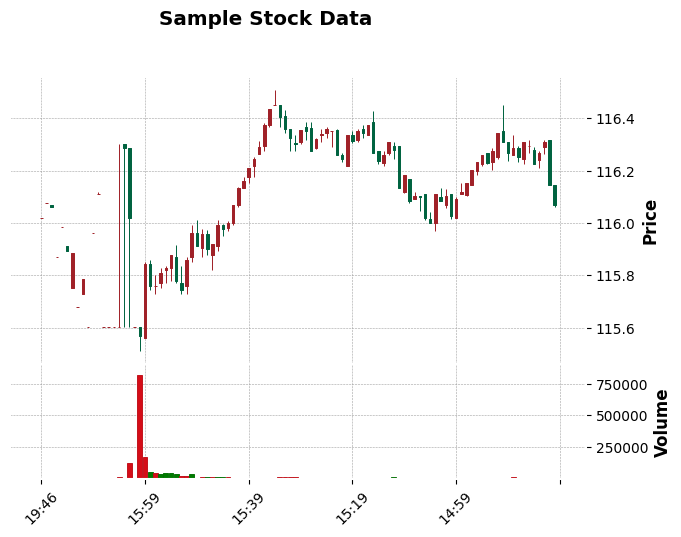

In [132]:
make_cangle_plot(df)

In [133]:
check_stock_symbol('JAZZ')

'JAZZ is a valid stock symbol: Jazz Pharmaceuticals plc'

In [134]:
df

,Open,High,Low,Close,Volume
Date,,,,,
2021-09-30 19:46:00,116.0186,116.0186,116.0186,116.0186,418
2021-09-30 19:42:00,116.0769,116.0769,116.0769,116.0769,437
2021-09-30 19:20:00,116.0602,116.0685,116.0602,116.0685,627
2021-09-30 18:20:00,115.8688,115.8688,115.8688,115.8688,376
2021-09-30 17:41:00,115.9852,115.9852,115.9852,115.9852,248
...,...,...,...,...,...
2021-09-30 14:44:00,116.2266,116.2890,116.2266,116.2807,5182
2021-09-30 14:43:00,116.2682,116.2757,116.2100,116.2391,4221
2021-09-30 14:42:00,116.3098,116.3182,116.2641,116.2890,7609


First example making stocks model. Most simple model - static mean and std

In [135]:
@sdepy.integrate
def my_process(t, x):
    return {'dt': df["High"].mean(), 'dw':  df["High"].std()}

P = my_process(x0=1, paths=100, steps=100)
x = P(timeline=(0., 0.5, 1.))
np.mean((x[2] - df["High"])**2)

1.1248036533502397

Prediction for next-day data

In [136]:
df_nd = get_stocks_data('IBM', '2021-10')
np.mean((x[2] - df_nd["High"])**2)

KeyError: 'Time Series (1min)'

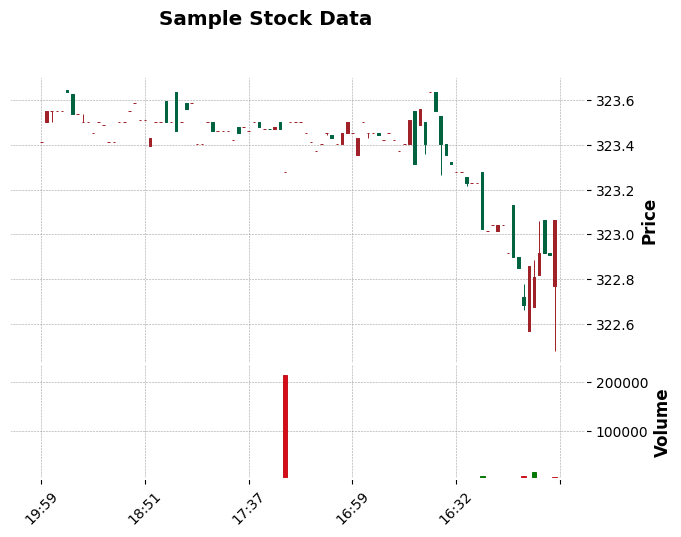

In [128]:
make_cangle_plot(df_nd)